The input and output shape: (684, 26) and (684,)


## Model selection

In [2]:
classes = ['less_benefit','much_benefit']
classify_test = clf.ClassificationProcessor(X, Y, orig_len, feature_names, classes)
# The sample weight before resample: Counter({'long_benefit': 175, 'short_benefit': 167, 'much_benefit': 32})
#'less_benefit': 342, 'much_benefit': 32
# 'long_benefit': 44, 'short_benefit': 42
# long_benefit': 175, 'short_benefit': 167

The confusion matrix of Decision Tree is: [[293  49]
 [ 11  21]]
Decision Tree Accuracy: 0.900 (0.039)


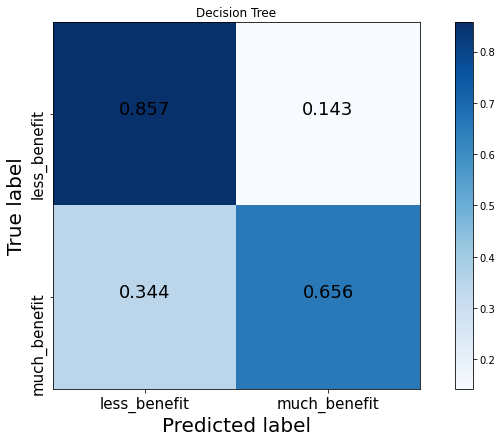

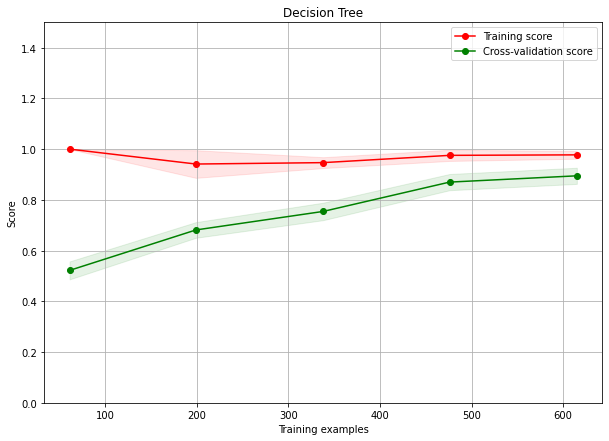

The confusion matrix of Random Forest is: [[324  18]
 [ 14  18]]
Random Forest Accuracy: 0.943 (0.014)


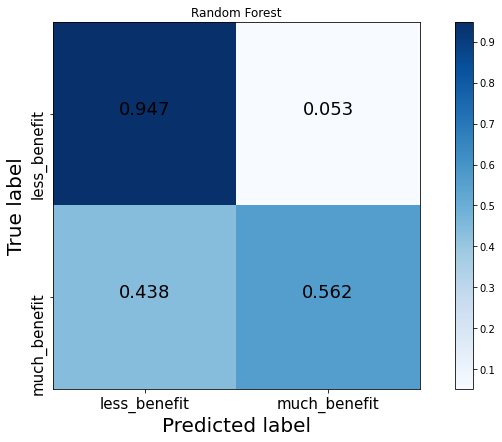

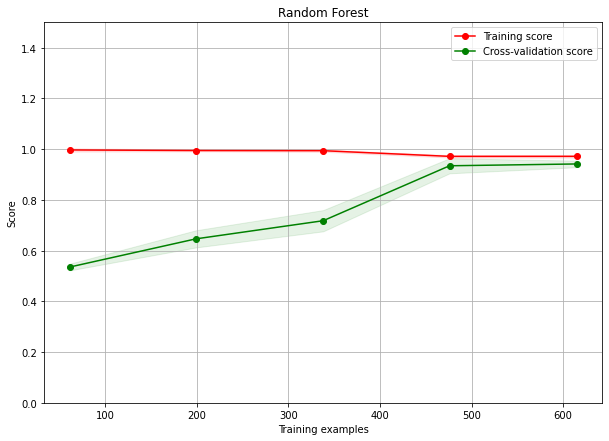

The confusion matrix of MLP is: [[311  31]
 [  0  32]]
MLP Accuracy: 0.954 (0.028)


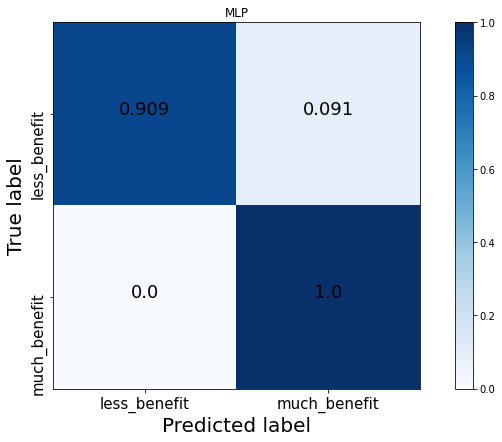

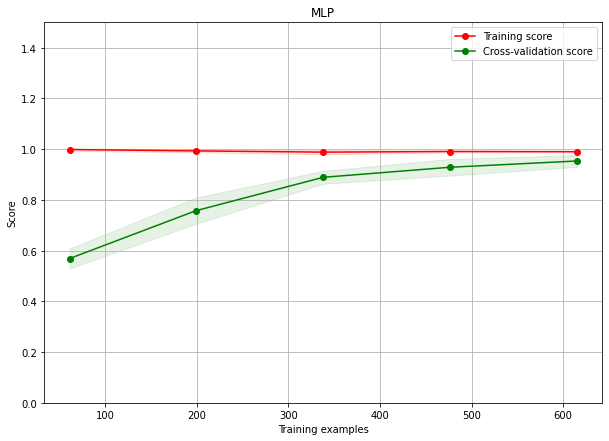

The confusion matrix of Linear SVM is: [[229 113]
 [  9  23]]
Linear SVM Accuracy: 0.723 (0.039)


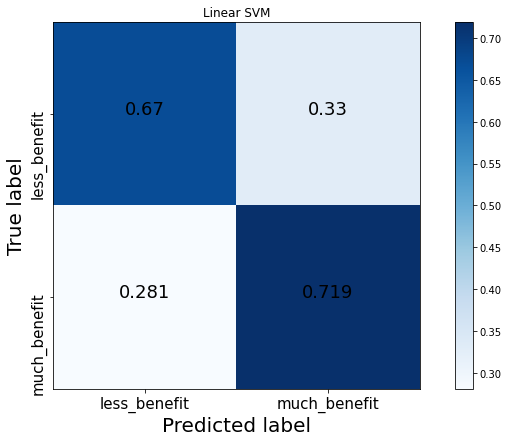

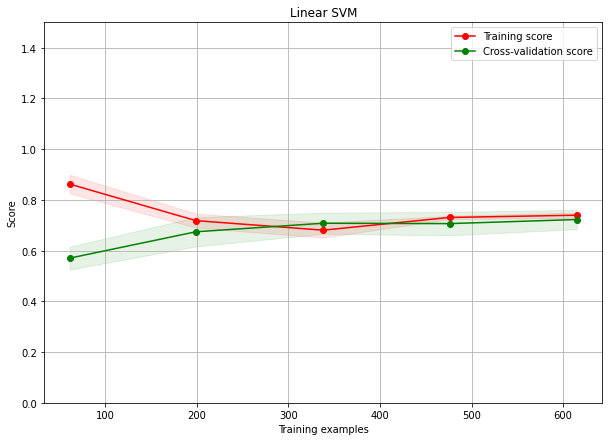

The confusion matrix of RBF SVM is: [[321  21]
 [  1  31]]
RBF SVM Accuracy: 0.966 (0.017)


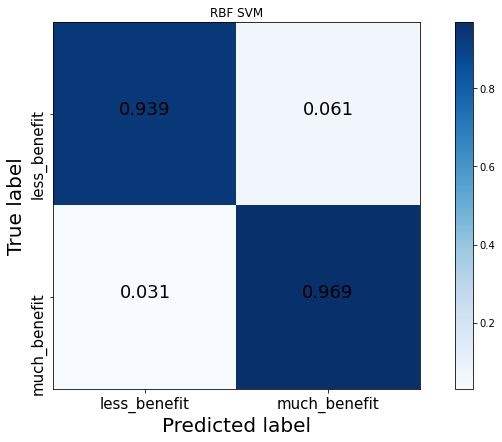

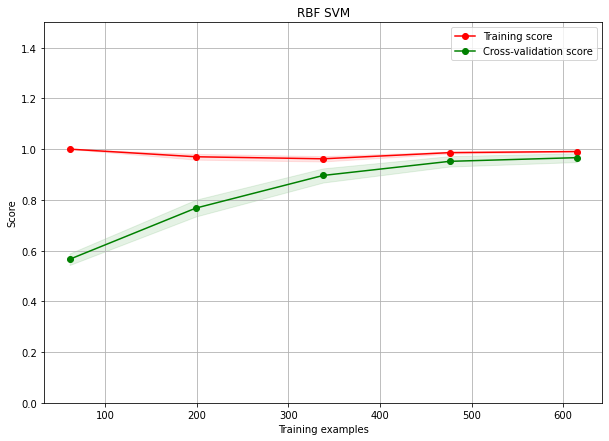

The confusion matrix of GDBT is: [[337   5]
 [ 15  17]]
GDBT Accuracy: 0.969 (0.014)


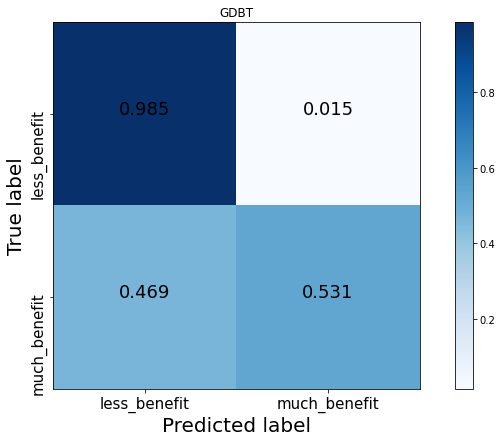

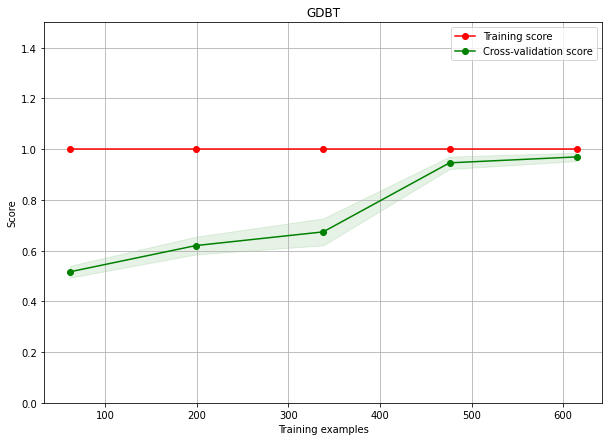

GDBT: got error: Traceback (most recent call last):
  File "/work/IndividualDifference/classification.py", line 121, in model_selection
    self.train_evaluate_model(name, clf, skf, self.X[:, 0:feature_num], self.Y, True)
  File "/work/IndividualDifference/classification.py", line 115, in train_evaluate_model
    return cfm[0][0]/cfm[0].sum(), cfm[1][1]/cfm[1].sum(), cfm[2][2]/cfm[2].sum(), accuracies, pred_y, prob_y # return acc for class 0,1,2
IndexError: index 2 is out of bounds for axis 0 with size 2



In [3]:
classify_test.model_selection(26)

In [ ]:
classify_test.model_selection(15)

In [ ]:
# classify_test.exhausive_feature_selection('RBF SVM')
classify_test.exhausive_feature_selection('Random Forest')
# classify_test.feature_selection('GDBT')

Features: 351/351

UnboundLocalError: local variable 'best_subset' referenced before assignment

## Final model

In [ ]:
classify_binary = clf.ClassificationProcessor(X, Y, orig_len, feature_names, classes)

shap

[[71 15]
 [ 7  1]]
[[58 28]
 [ 3  5]]
[[69 17]
 [ 8  0]]
[[40 46]
 [ 2  6]]
[[79  7]
 [ 6  2]]
[[75 11]
 [ 4  4]]


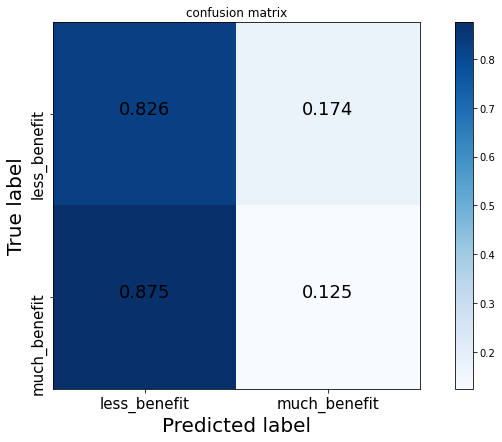

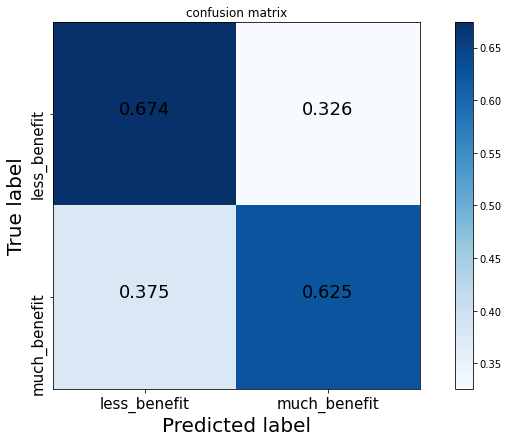

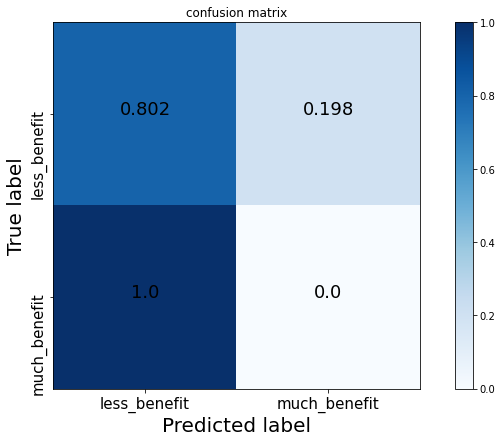

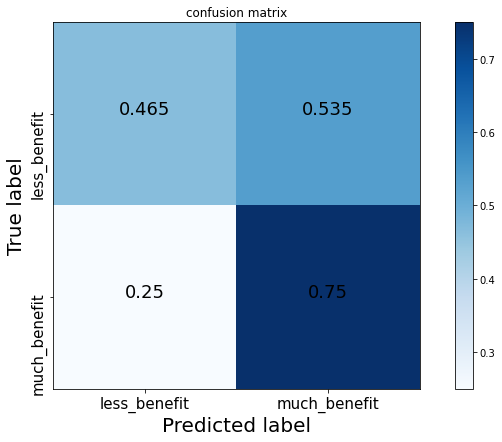

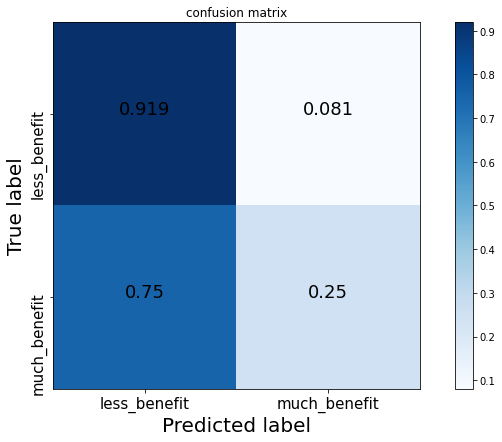

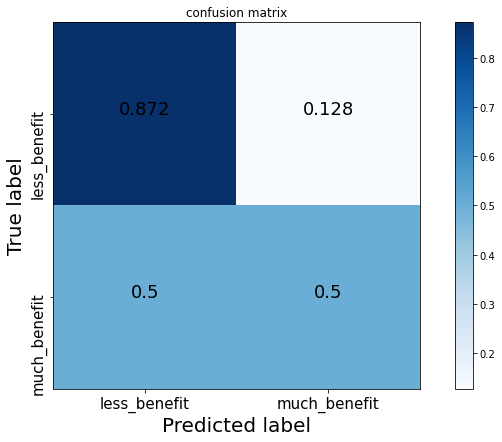

In [ ]:
NAMES = ['Decision Tree','Random Forest', 'MLP', "Linear SVM", "RBF SVM", 'GDBT']
for i in NAMES:
    final_model = classify_binary.models[i]
    classify_binary.final_model(final_model, x_test, y_test)

shap

AttributeError: 'ClassificationProcessor' object has no attribute 'shap_tree'

In [ ]:
# shap_all, expected_shap = clf.read_inputs(data_path,['shap_values.data','shap_expected.data'])
# classify_test.shap_visualize(shap_all, expected_shap, final_accuracies, final_pred_y, False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c9e1ba2-0cb9-40ed-a01b-b56de82eb464' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>